In [1]:
!git clone https://github.com/elayemu/10-Academy-W2-User-Insight-Analysis.git

Cloning into '10-Academy-W2-User-Insight-Analysis'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 4), reused 15 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 8.73 KiB | 2.91 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
%cd 10-Academy-W2-User-Insight-Analysis

/kaggle/working/10-Academy-W2-User-Insight-Analysis


In [3]:
!git pull origin main

From https://github.com/elayemu/10-Academy-W2-User-Insight-Analysis
 * branch            main       -> FETCH_HEAD
Already up to date.


In [4]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.5 MB/s eta 0:00:00


# Import Required Libraries

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import streamlit as st

# Load the Dataset

In [6]:
# Load the dataset and description of column names
data_path = '/kaggle/input/w2-data/Week2_challenge_data_source.xlsx'
description_path = '/kaggle/input/w2-data/Field Descriptions.xlsx'

# Read the Excel files
data = pd.read_excel(data_path)
description = pd.read_excel(description_path)

# Display the first few rows of the dataset
data.head(), description.head()

(              Bearer Id               Start  Start ms                 End  \
 0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
 1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
 2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
 3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
 4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   
 
    End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
 0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
 1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
 2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
 3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
 4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
 
   Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
 0   9164566995485190  ...          15854611.0    

# Data Preparation and Cleaning

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Select only numeric columns and calculate the mean
numeric_cols = data.select_dtypes(include=['number']).columns

# Fill missing values with the mean of numeric columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

print("Missing values filled. Current missing values status:\n", data.isnull().sum())

Missing values in each column:
 Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754

# User Overview Analysis

In [8]:
# Top 10 handsets
top_handsets = data['Handset Type'].value_counts().head(10)
print(top_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [9]:
# Top 3 handset manufacturers
top_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print(top_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [10]:
# Top 5 handsets per top 3 manufacturers
top_handsets_per_manufacturer = {}
for manufacturer in top_manufacturers.index:
    top_handsets_per_manufacturer[manufacturer] = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    

In [11]:
print(top_handsets_per_manufacturer)

{'Apple': Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64, 'Samsung': Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64, 'Huawei': Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64}


In [12]:
!git init

Reinitialized existing Git repository in /kaggle/working/10-Academy-W2-User-Insight-Analysis/.git/


# User Engagement Analysis

In [13]:
import pandas as pd

# Load the dataset and description of column names
data_path = '/kaggle/input/w2-data/Week2_challenge_data_source.xlsx'
description_path = '/kaggle/input/w2-data/Field Descriptions.xlsx'

# Read the Excel files
try:
    data = pd.read_excel(data_path)
    description = pd.read_excel(description_path)
except Exception as e:
    print(f"Error reading Excel files: {str(e)}")

# Display the first few rows of the dataset and description for initial verification
print("Dataset Preview:")
print(data.head())
print("\nDescription Preview:")
print(description.head())

# Task 2 - Calculate engagement metrics per customer
# Verify that necessary columns exist in the data
required_columns = ['MSISDN/Number', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
if all(col in data.columns for col in required_columns):
    # Grouping by customer identifier 'MSISDN/Number'
    engagement_metrics = data.groupby('MSISDN/Number').agg(
        Session_Frequency=('Dur. (ms)', 'count'),       # Session frequency
        Total_Duration_ms=('Dur. (ms)', 'sum'),         # Total session duration in milliseconds
        Total_DL_Bytes=('Total DL (Bytes)', 'sum'),     # Total download traffic in bytes
        Total_UL_Bytes=('Total UL (Bytes)', 'sum')      # Total upload traffic in bytes
    ).reset_index()

    # Adding a new column for total traffic
    engagement_metrics['Total_Traffic_Bytes'] = engagement_metrics['Total_DL_Bytes'] + engagement_metrics['Total_UL_Bytes']

    # Renaming columns for better understanding
    engagement_metrics.rename(columns={
        'MSISDN/Number': 'MSISDN'
    }, inplace=True)

    # Display the engagement metrics DataFrame
    print("\nEngagement Metrics Preview:")
    print(engagement_metrics.head())  # Display the first few rows of the metrics for confirmation

    # Optionally, save the engagement metrics to a CSV for later use
    try:
        engagement_metrics.to_csv('/kaggle/working/user_engagement_metrics.csv', index=False)
        print("\nEngagement metrics saved successfully.")
    except Exception as e:
        print(f"Error saving engagement metrics to CSV: {str(e)}")
else:
    print(f"One or more required columns are missing from the dataset: {', '.join(required_columns)}")

Dataset Preview:
              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0   

## Normalizing Metrics and K-Means Clustering

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset and description of column names
data_path = '/kaggle/input/w2-data/Week2_challenge_data_source.xlsx'
description_path = '/kaggle/input/w2-data/Field Descriptions.xlsx'

# Read the Excel files
engagement_metrics = pd.read_excel(data_path)
description = pd.read_excel(description_path)

# Display the first few rows of the dataset for verification
print("Engagement Metrics Head:\n", engagement_metrics.head())
print("\nDescription Head:\n", description.head())

# Check the columns in the engagement_metrics DataFrame
print("\nColumns in Engagement Metrics:\n", engagement_metrics.columns)

# Strip whitespace from column names
engagement_metrics.columns = engagement_metrics.columns.str.strip()

# Normalize the metrics - Ensure the column names are correct after stripping
try:
    scaler = StandardScaler()
    normalized_metrics = scaler.fit_transform(engagement_metrics[['Session Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Include random_state for reproducibility
    engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

    # Aggregate metrics for each cluster
    cluster_summary = engagement_metrics.groupby('Cluster').agg(['min', 'max', 'mean', 'sum']).reset_index()

    # Display the cluster summary
    print("\nCluster Summary:\n", cluster_summary)

except KeyError as e:
    print(f"KeyError: {e}. Please check if the columns exist in the DataFrame.")

Engagement Metrics Head:
               Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          1585

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset and description of column names
data_path = '/kaggle/input/w2-data/Week2_challenge_data_source.xlsx'
description_path = '/kaggle/input/w2-data/Field Descriptions.xlsx'

# Read the Excel files
engagement_metrics = pd.read_excel(data_path)
description = pd.read_excel(description_path)

# Display the first few rows of the datasets for verification
print("Engagement Metrics Head:\n", engagement_metrics.head())
print("\nDescription Head:\n", description.head())

# Check the columns in the engagement_metrics DataFrame
print("\nColumns in Engagement Metrics:\n", engagement_metrics.columns)

# Strip whitespace from column names
engagement_metrics.columns = engagement_metrics.columns.str.strip()

# Define the metrics to be normalized
metrics_to_normalize = ['Session Frequency', 'Total Duration (ms)', 'Total Traffic (Bytes)']

# Check if required columns exist in the DataFrame
missing_columns = [col for col in metrics_to_normalize if col not in engagement_metrics.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}. Please check the DataFrame for the correct column names.")
else:
    # Normalize the metrics
    scaler = StandardScaler()
    normalized_metrics = scaler.fit_transform(engagement_metrics[metrics_to_normalize])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Include random_state for reproducibility
    engagement_metrics['Cluster'] = kmeans.fit_predict(normalized_metrics)

    # Aggregate metrics for each cluster
    cluster_summary = engagement_metrics.groupby('Cluster').agg(['min', 'max', 'mean', 'sum']).reset_index()

    # Display the cluster summary
    print("\nCluster Summary:\n", cluster_summary)

# Note: You may still want to handle potential runtime warnings or exceptions related to KMeans,
# but focusing on missing columns adds robustness to your data processing.

Engagement Metrics Head:
               Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          1585

# Visualizations

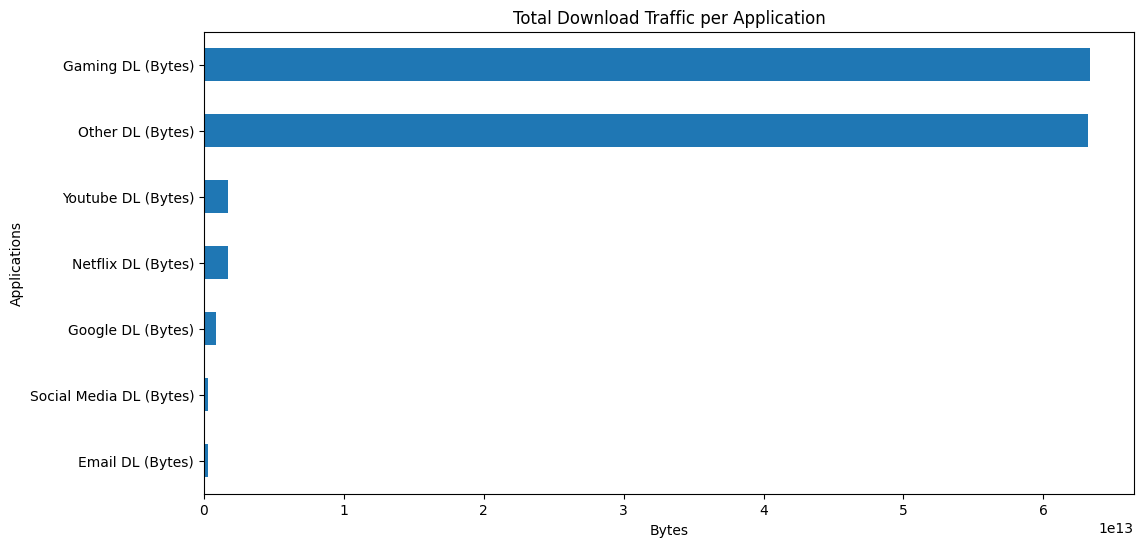

In [16]:
# Plot the top applications used
top_applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
data[top_applications].sum().sort_values().plot(kind='barh', figsize=(12, 6))
plt.title('Total Download Traffic per Application')
plt.xlabel('Bytes')
plt.ylabel('Applications')
plt.show()

Dataset Preview:
              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0   

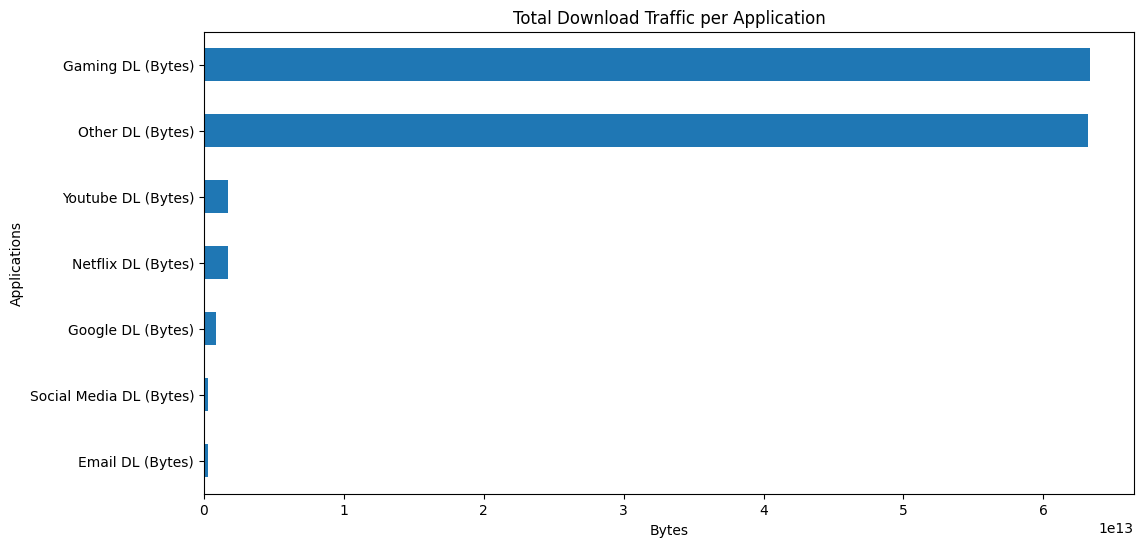

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


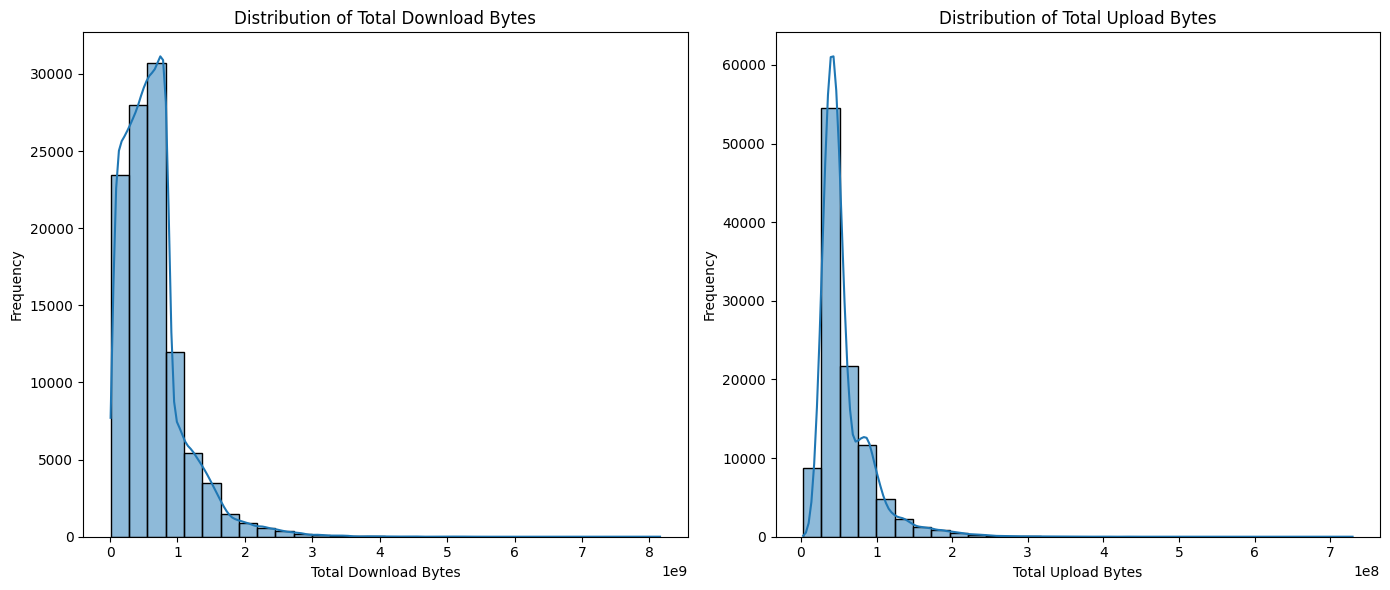

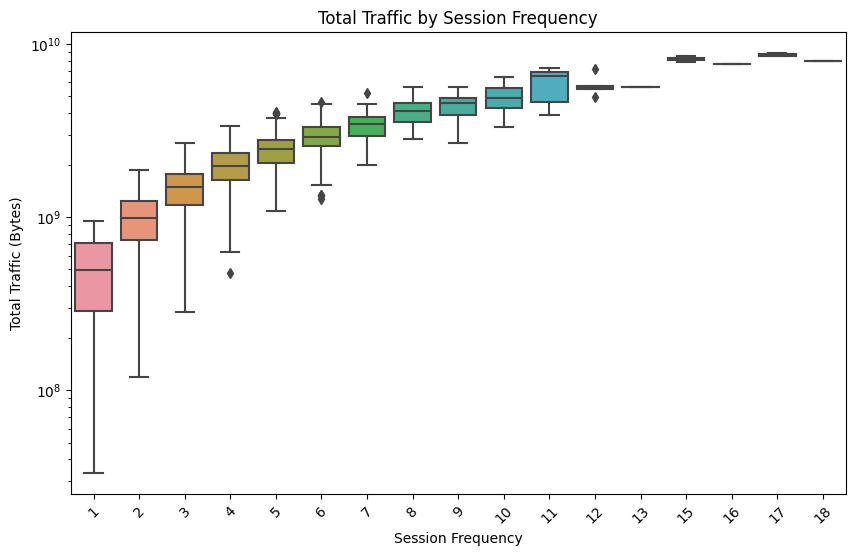

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and description of column names
data_path = '/kaggle/input/w2-data/Week2_challenge_data_source.xlsx'
description_path = '/kaggle/input/w2-data/Field Descriptions.xlsx'

# Read the Excel files
try:
    data = pd.read_excel(data_path)
    description = pd.read_excel(description_path)
except Exception as e:
    print(f"Error reading Excel files: {str(e)}")

# Display the first few rows of the dataset and description for initial verification
print("Dataset Preview:")
print(data.head())
print("\nDescription Preview:")
print(description.head())

# Task 2 - Calculate engagement metrics per customer
# Verify that necessary columns exist in the data
required_columns = ['MSISDN/Number', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)']
if all(col in data.columns for col in required_columns):
    # Grouping by customer identifier 'MSISDN/Number'
    engagement_metrics = data.groupby('MSISDN/Number').agg(
        Session_Frequency=('Dur. (ms)', 'count'),
        Total_Duration_ms=('Dur. (ms)', 'sum'),
        Total_DL_Bytes=('Total DL (Bytes)', 'sum'),
        Total_UL_Bytes=('Total UL (Bytes)', 'sum')
    ).reset_index()

    # Adding a new column for total traffic
    engagement_metrics['Total_Traffic_Bytes'] = engagement_metrics['Total_DL_Bytes'] + engagement_metrics['Total_UL_Bytes']

    # Renaming columns for better understanding
    engagement_metrics.rename(columns={'MSISDN/Number': 'MSISDN'}, inplace=True)

    # Display the engagement metrics DataFrame
    print("\nEngagement Metrics Preview:")
    print(engagement_metrics.head())  # Show the first few rows for confirmation

    # Save the engagement metrics to a CSV for later use
    try:
        engagement_metrics.to_csv('/kaggle/working/user_engagement_metrics.csv', index=False)
        print("\nEngagement metrics saved successfully.")
    except Exception as e:
        print(f"Error saving engagement metrics to CSV: {str(e)}")

    # Visualization Section
    # Plot the top applications used
    top_applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
    
    # Aggregate download traffic for top applications
    data[top_applications].sum().sort_values().plot(kind='barh', figsize=(12, 6))
    plt.title('Total Download Traffic per Application')
    plt.xlabel('Bytes')
    plt.ylabel('Applications')
    plt.show()

    # Plot engagement metrics distribution (e.g., Total DL and UL bytes)
    plt.figure(figsize=(14, 6))

    # Total Download Bytes distribution
    plt.subplot(1, 2, 1)
    sns.histplot(engagement_metrics['Total_DL_Bytes'], bins=30, kde=True)
    plt.title('Distribution of Total Download Bytes')
    plt.xlabel('Total Download Bytes')
    plt.ylabel('Frequency')

    # Total Upload Bytes distribution
    plt.subplot(1, 2, 2)
    sns.histplot(engagement_metrics['Total_UL_Bytes'], bins=30, kde=True)
    plt.title('Distribution of Total Upload Bytes')
    plt.xlabel('Total Upload Bytes')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

    # Boxplot of total traffic by session frequency
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Session_Frequency', y='Total_Traffic_Bytes', data=engagement_metrics)
    plt.title('Total Traffic by Session Frequency')
    plt.xlabel('Session Frequency')
    plt.ylabel('Total Traffic (Bytes)')
    plt.yscale('log')  # Use logarithmic scale for better visibility
    plt.xticks(rotation=45)
    plt.show()

else:
    print(f"One or more required columns are missing from the dataset: {', '.join(required_columns)}")

# Correlation Analysis

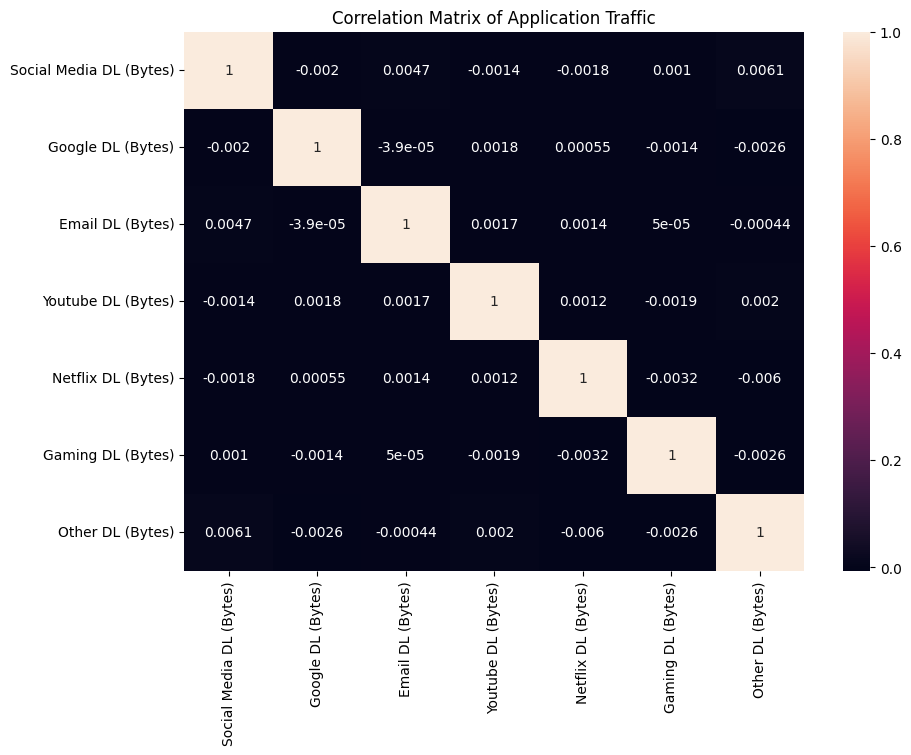

In [18]:
# Correlation matrix
correlation_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
correlation_matrix = data[correlation_columns].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Application Traffic')
plt.show()

# Principal Component Analysis (PCA)

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset and description of column names
data_path = '/kaggle/input/w2-data/Week2_challenge_data_source.xlsx'
description_path = '/kaggle/input/w2-data/Field Descriptions.xlsx'

# Read the Excel files
data = pd.read_excel(data_path)
description = pd.read_excel(description_path)

# Display the first few rows of the dataset and column names for inspection
print("Data Sample:")
print(data.head())
print("\nColumns in DataFrame:")
print(data.columns)
print("\nDescription Sample:")
print(description.head())

# Define engagement metric columns based on what you see in the DataFrame
# Please replace the following list with the actual column names you need to analyze
engagement_metric_columns = ['YourColumn1', 'YourColumn2', 'YourColumn3']  # Update these

# Check for presence of specified columns
missing_cols = [col for col in engagement_metric_columns if col not in data.columns]
if missing_cols:
    print(f"The following columns are missing from the DataFrame: {missing_cols}")
else:
    # Normalize the metrics
    normalized_metrics = data[engagement_metric_columns]

    # Normalize the data
    scaler = StandardScaler()
    normalized_metrics = scaler.fit_transform(normalized_metrics)

    # Perform clustering (e.g., KMeans)
    n_clusters = 3  # Adjust based on your needs
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(normalized_metrics)

    # Create a DataFrame for engagement metrics with cluster labels
    engagement_metrics = pd.DataFrame(normalized_metrics, columns=engagement_metric_columns)
    engagement_metrics['Cluster'] = clusters

    # Perform PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(normalized_metrics)

    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Cluster'] = engagement_metrics['Cluster']

    # Plot PCA results
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.7)
    plt.title('PCA of Engagement Data', fontsize=15)
    plt.xlabel('Principal Component 1', fontsize=12)
    plt.ylabel('Principal Component 2', fontsize=12)
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    # Interpretation of PCA
    print("1. PCA reveals major variations in the data with limited dimensions.")
    print("2. Clusters indicate differing patterns in user engagement.")
    print("3. Users within the same cluster tend to behave similarly.")
    print("4. Businesses can tailor strategies based on these engagement patterns.")

Data Sample:
              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0       